# Basic Libraries

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
cd C:\Users\anime\OneDrive\Desktop\SunBase Data

C:\Users\anime\OneDrive\Desktop\SunBase Data


### Reading the data

In [166]:
# df = pd. read_excel('customer_churn_large_dataset.xlsx', header = 0)
# df.to_csv('customer_churn_large_dataset.csv', index = False)
df = pd.read_csv('customer_churn_large_dataset.csv')

In [167]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


### Data Preprocessing

In [168]:
df.drop(['CustomerID', 'Name'], axis = 1, inplace = True)          #Removing useless columns
df.dtypes

Age                           float64
Gender                         object
Location                       object
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                         float64
dtype: object

In [169]:
df.isnull().sum()             #Checking for NULL values

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

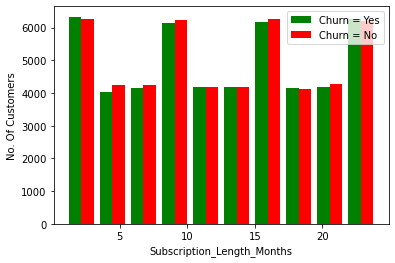

In [170]:
churn_no = df[df.Churn == 0].Subscription_Length_Months
churn_yes = df[df.Churn == 1].Subscription_Length_Months

plt.xlabel("Subscription_Length_Months")
plt.ylabel("No. Of Customers")

plt.hist([churn_yes, churn_no], color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

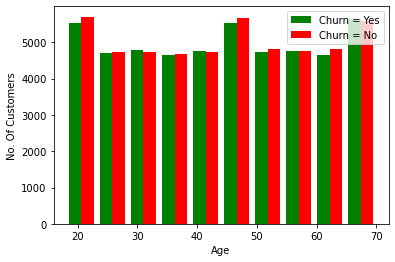

In [171]:
churn_no = df[df.Churn==0].Age
churn_yes = df[df.Churn==1].Age

plt.xlabel("Age")
plt.ylabel("No. Of Customers")

plt.hist([churn_yes, churn_no], color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

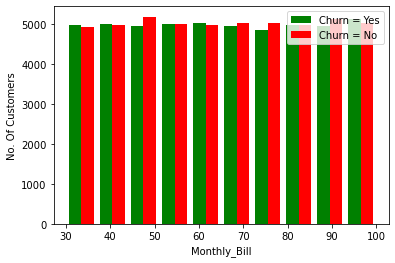

In [172]:
churn_no = df[df.Churn==0].Monthly_Bill
churn_yes = df[df.Churn==1].Monthly_Bill

plt.xlabel("Monthly_Bill")
plt.ylabel("No. Of Customers")

plt.hist([churn_yes, churn_no], color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

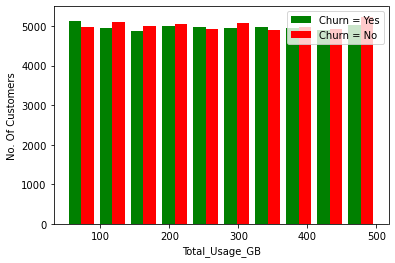

In [173]:
churn_no = df[df.Churn==0].Total_Usage_GB
churn_yes = df[df.Churn==1].Total_Usage_GB

plt.xlabel("Total_Usage_GB")
plt.ylabel("No. Of Customers")

plt.hist([churn_yes, churn_no], color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

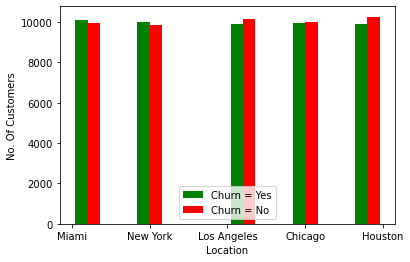

In [174]:
churn_no = df[df.Churn==0].Location
churn_yes = df[df.Churn==1].Location

plt.xlabel("Location")
plt.ylabel("No. Of Customers")

plt.hist([churn_yes, churn_no], color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

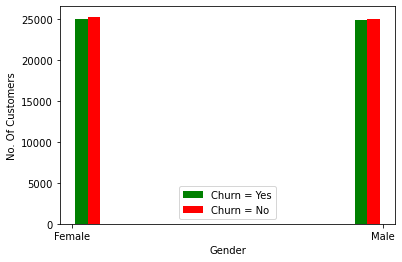

In [175]:
churn_no = df[df.Churn==0].Gender
churn_yes = df[df.Churn==1].Gender

plt.xlabel("Gender")
plt.ylabel("No. Of Customers")

plt.hist([churn_yes, churn_no], color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

Since Gender & Location are not decisive parameters for the customer churn, we can remove them altogether.

In [176]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()              #Label Encoding

df['Gender']= label_encoder.fit_transform(df['Gender'])
# df.drop(['Location', 'Gender'], axis = 1, inplace = True)

In [177]:
dummies = pd.get_dummies(df.Location)                     #One Hot Encoding
df = pd.concat([df, dummies], axis = 'columns')
df.drop(['Location','Chicago'], axis = 1 , inplace = True)

In [178]:
df['Data_Cost'] = df['Monthly_Bill'] / df['Total_Usage_GB']  #Data Cost is GB per unit currency in the location

In [181]:
for col in df:                             #All unique values in the dataset
    print(f'{col}: {df[col].unique()}')

Age: [63. 62. 24. 36. 46. 67. 30. 20. 53. 50. 44. 34. 28. 42. 55. 43. 31. 41.
 58. 64. 70. 18. 25. 27. 66. 29. 60. 26. 45. 19. 37. 49. 38. 57. 47. 48.
 40. 21. 33. 51. 35. 69. 61. 52. 39. 56. 59. 65. 22. 54. 68. 32. 23.]
Gender: [1 0]
Subscription_Length_Months: [17.  1.  5.  3. 19. 15. 10. 12. 20. 13.  8. 23.  2.  4. 18.  9. 14. 16.
  6.  7. 24. 22. 11. 21.]
Monthly_Bill: [73.36 48.76 85.47 ... 75.21 41.98 83.55]
Total_Usage_GB: [236. 172. 460. 297. 266. 456. 269. 396. 150. 383. 442. 295. 148. 239.
 233. 231. 198. 354. 429. 243. 270. 389. 226. 393.  89. 183. 135. 185.
 151. 115. 194. 278. 423. 202. 495. 162. 101. 294. 122. 305. 212. 220.
 253. 411. 447. 218. 221. 166.  64.  67. 391. 232. 298. 334. 326. 459.
 371. 299. 376. 214. 329.  50. 444. 113.  76. 134. 184. 319. 235.  85.
 332.  73. 369. 308. 446. 321.  83. 114. 296. 102. 215. 169. 225. 140.
  84. 463. 402. 468. 375. 366. 404. 471. 204. 320. 178. 149. 361. 304.
 281. 177. 117. 137. 322. 427. 403. 237. 439. 336. 344. 288. 257. 196

# ANN

In [182]:
#Scaling
from sklearn.preprocessing import MinMaxScaler                         
cols2scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
scaler = MinMaxScaler()

df[cols2scale] = scaler.fit_transform(df[cols2scale])

In [183]:
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Houston,Los Angeles,Miami,New York,Data_Cost
0,0.865385,1,0.695652,0.619429,0.413333,0,0,1,0,0,0.310847
1,0.846154,0,0.000000,0.268000,0.271111,0,0,0,0,1,0.283488
2,0.115385,0,0.173913,0.792429,0.911111,0,0,1,0,0,0.185804
3,0.346154,0,0.086957,0.970571,0.548889,1,0,0,1,0,0.329764
4,0.538462,0,0.782609,0.402000,0.480000,0,0,0,1,0,0.218571


In [196]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis = 'columns')
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 64)

In [197]:
print(X_train.shape)
print(X_test.shape)

(90000, 10)
(10000, 10)


In [198]:
len(X_train.columns)

10

In [199]:
y_train

8475     0
37416    0
19093    0
84690    0
77763    0
        ..
41969    0
49206    1
88183    0
87014    1
39364    0
Name: Churn, Length: 90000, dtype: int32

In [203]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential(
[
    keras.layers.Dense(10, input_shape = (10,), activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
2813/2813 [==============================] - 17s 6ms/step - loss: 0.6964 - accuracy: 0.5026
Epoch 2/20
2813/2813 [==============================] - 19s 7ms/step - loss: 0.6933 - accuracy: 0.5014
Epoch 3/20
2813/2813 [==============================] - 20s 7ms/step - loss: 0.6932 - accuracy: 0.5008
Epoch 4/20
2813/2813 [==============================] - 18s 6ms/step - loss: 0.6932 - accuracy: 0.4976
Epoch 5/20
2813/2813 [==============================] - 17s 6ms/step - loss: 0.6932 - accuracy: 0.4995
Epoch 6/20
2813/2813 [==============================] - 17s 6ms/step - loss: 0.6932 - accuracy: 0.4993 
Epoch 7/20
2813/2813 [==============================] - 16s 6ms/step - loss: 0.6932 - accuracy: 0.5010
Epoch 8/20
2813/2813 [==============================] - 16s 6ms/step - loss: 0.6932 - accuracy: 0.5012
Epoch 9/20
2813/2813 [==============================] - 18s 6ms/step - loss: 0.6932 - accuracy: 0.5003
Epoch 10/20
2813/2813 [==============================] - 17s 6ms/step - 

In [204]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 10)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 7)                 77        
_________________________________________________________________
dropout_5 (Dropout)          (None, 7)               

In [110]:
model.evaluate(X_test, y_test)

625/625 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.4946


[0.6932796835899353, 0.49459999799728394]

In [111]:
yp = model.predict(X_test)

In [157]:
y_pred = []
for element in yp:
    if element >= 0.498:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [158]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.83      0.62      9950
         1.0       0.49      0.17      0.25     10050

    accuracy                           0.50     20000
   macro avg       0.49      0.50      0.43     20000
weighted avg       0.49      0.50      0.43     20000



Text(69.0, 0.5, 'Truth')

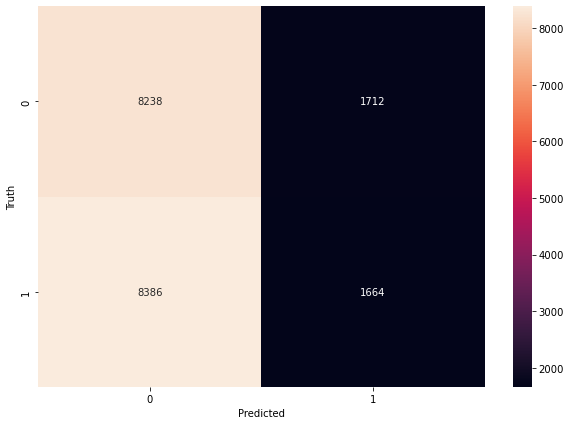

In [159]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# ML Approach

In [70]:
df1 = pd.read_csv("customer_churn_large_dataset.csv")

In [71]:
df1.drop(['CustomerID', 'Name'], axis = 1, inplace = True)
df1.dtypes

Age                           float64
Gender                         object
Location                       object
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                         float64
dtype: object

In [72]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df1['Gender']= label_encoder.fit_transform(df1['Gender'])

In [73]:
dummies = pd.get_dummies(df1.Location)
df1 = pd.concat([df1, dummies], axis = 'columns')
df1.drop(['Location','Chicago'], axis = 1 , inplace = True)

In [74]:
df1['Data_Cost'] = df1['Monthly_Bill'] / df1['Total_Usage_GB']  

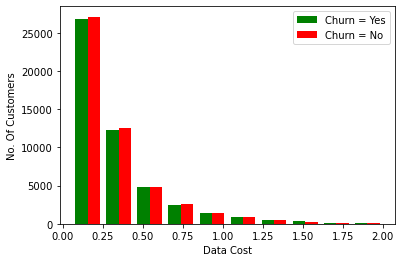

In [76]:
churn_no = df1[df1.Churn==0].Data_Cost
churn_yes = df1[df1.Churn==1].Data_Cost

plt.xlabel("Data Cost")
plt.ylabel("No. Of Customers")

plt.hist([churn_yes, churn_no], color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

In [79]:
df1['Churn'].value_counts()

0.0    50221
1.0    49779
Name: Churn, dtype: int64

In [68]:
df1.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Houston,Los Angeles,Miami,New York,Data Cost
0,63.0,1,17.0,73.36,236.0,0.0,0,1,0,0,0.310847
1,62.0,0,1.0,48.76,172.0,0.0,0,0,0,1,0.283488
2,24.0,0,5.0,85.47,460.0,0.0,0,1,0,0,0.185804
3,36.0,0,3.0,97.94,297.0,1.0,0,0,1,0,0.329764
4,46.0,0,19.0,58.14,266.0,0.0,0,0,1,0,0.218571


In [225]:
from sklearn.model_selection import train_test_split
X = df1.drop('Churn', axis = 'columns')
y = df1['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### XGBoost

In [84]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [85]:
model_xgb.predict(X_test)

array([1, 1, 0, ..., 0, 1, 1])

In [86]:
model_xgb.score(X_test, y_test)

0.50115

### CatBoost

In [87]:
from catboost import CatBoostClassifier
model_cat = CatBoostClassifier()
model_cat.fit(X_train, y_train)

Learning rate set to 0.06692
0:	learn: 0.6930818	total: 14ms	remaining: 14s
1:	learn: 0.6930406	total: 27.1ms	remaining: 13.5s
2:	learn: 0.6930072	total: 39.7ms	remaining: 13.2s
3:	learn: 0.6929464	total: 51.9ms	remaining: 12.9s
4:	learn: 0.6928967	total: 65ms	remaining: 12.9s
5:	learn: 0.6928683	total: 75.2ms	remaining: 12.5s
6:	learn: 0.6927935	total: 85.9ms	remaining: 12.2s
7:	learn: 0.6927435	total: 98.3ms	remaining: 12.2s
8:	learn: 0.6927018	total: 110ms	remaining: 12.1s
9:	learn: 0.6926529	total: 121ms	remaining: 11.9s
10:	learn: 0.6926097	total: 131ms	remaining: 11.8s
11:	learn: 0.6925584	total: 142ms	remaining: 11.7s
12:	learn: 0.6925311	total: 152ms	remaining: 11.6s
13:	learn: 0.6924633	total: 164ms	remaining: 11.6s
14:	learn: 0.6924268	total: 176ms	remaining: 11.5s
15:	learn: 0.6923854	total: 188ms	remaining: 11.6s
16:	learn: 0.6923418	total: 203ms	remaining: 11.8s
17:	learn: 0.6922910	total: 221ms	remaining: 12s
18:	learn: 0.6922537	total: 232ms	remaining: 12s
19:	learn: 0.6

161:	learn: 0.6872603	total: 2.37s	remaining: 12.3s
162:	learn: 0.6872215	total: 2.38s	remaining: 12.2s
163:	learn: 0.6871977	total: 2.4s	remaining: 12.2s
164:	learn: 0.6871687	total: 2.41s	remaining: 12.2s
165:	learn: 0.6871284	total: 2.42s	remaining: 12.2s
166:	learn: 0.6870922	total: 2.43s	remaining: 12.1s
167:	learn: 0.6870463	total: 2.45s	remaining: 12.1s
168:	learn: 0.6869933	total: 2.47s	remaining: 12.1s
169:	learn: 0.6869503	total: 2.49s	remaining: 12.1s
170:	learn: 0.6869026	total: 2.5s	remaining: 12.1s
171:	learn: 0.6868561	total: 2.52s	remaining: 12.1s
172:	learn: 0.6868193	total: 2.54s	remaining: 12.2s
173:	learn: 0.6867751	total: 2.56s	remaining: 12.2s
174:	learn: 0.6867403	total: 2.58s	remaining: 12.2s
175:	learn: 0.6866882	total: 2.61s	remaining: 12.2s
176:	learn: 0.6866402	total: 2.62s	remaining: 12.2s
177:	learn: 0.6865882	total: 2.63s	remaining: 12.2s
178:	learn: 0.6865458	total: 2.65s	remaining: 12.1s
179:	learn: 0.6865128	total: 2.66s	remaining: 12.1s
180:	learn: 0.

325:	learn: 0.6805176	total: 4.53s	remaining: 9.37s
326:	learn: 0.6804923	total: 4.54s	remaining: 9.35s
327:	learn: 0.6804370	total: 4.56s	remaining: 9.34s
328:	learn: 0.6804000	total: 4.57s	remaining: 9.33s
329:	learn: 0.6803594	total: 4.59s	remaining: 9.31s
330:	learn: 0.6803086	total: 4.6s	remaining: 9.3s
331:	learn: 0.6802587	total: 4.61s	remaining: 9.28s
332:	learn: 0.6802231	total: 4.63s	remaining: 9.27s
333:	learn: 0.6801724	total: 4.64s	remaining: 9.25s
334:	learn: 0.6801368	total: 4.65s	remaining: 9.24s
335:	learn: 0.6800900	total: 4.67s	remaining: 9.22s
336:	learn: 0.6800385	total: 4.68s	remaining: 9.21s
337:	learn: 0.6799924	total: 4.69s	remaining: 9.19s
338:	learn: 0.6799606	total: 4.71s	remaining: 9.18s
339:	learn: 0.6799169	total: 4.72s	remaining: 9.16s
340:	learn: 0.6798698	total: 4.73s	remaining: 9.15s
341:	learn: 0.6798366	total: 4.75s	remaining: 9.13s
342:	learn: 0.6797828	total: 4.76s	remaining: 9.12s
343:	learn: 0.6797368	total: 4.77s	remaining: 9.1s
344:	learn: 0.6

499:	learn: 0.6741457	total: 6.72s	remaining: 6.72s
500:	learn: 0.6741149	total: 6.74s	remaining: 6.71s
501:	learn: 0.6740856	total: 6.75s	remaining: 6.7s
502:	learn: 0.6740508	total: 6.76s	remaining: 6.68s
503:	learn: 0.6740154	total: 6.77s	remaining: 6.67s
504:	learn: 0.6739745	total: 6.79s	remaining: 6.65s
505:	learn: 0.6739315	total: 6.8s	remaining: 6.64s
506:	learn: 0.6738990	total: 6.81s	remaining: 6.62s
507:	learn: 0.6738624	total: 6.82s	remaining: 6.61s
508:	learn: 0.6738115	total: 6.83s	remaining: 6.59s
509:	learn: 0.6737892	total: 6.85s	remaining: 6.58s
510:	learn: 0.6737580	total: 6.86s	remaining: 6.56s
511:	learn: 0.6737202	total: 6.87s	remaining: 6.55s
512:	learn: 0.6736872	total: 6.88s	remaining: 6.53s
513:	learn: 0.6736581	total: 6.89s	remaining: 6.52s
514:	learn: 0.6736360	total: 6.91s	remaining: 6.5s
515:	learn: 0.6735994	total: 6.92s	remaining: 6.49s
516:	learn: 0.6735689	total: 6.93s	remaining: 6.47s
517:	learn: 0.6735361	total: 6.94s	remaining: 6.46s
518:	learn: 0.6

666:	learn: 0.6686969	total: 8.9s	remaining: 4.44s
667:	learn: 0.6686671	total: 8.91s	remaining: 4.43s
668:	learn: 0.6686373	total: 8.92s	remaining: 4.41s
669:	learn: 0.6686001	total: 8.93s	remaining: 4.4s
670:	learn: 0.6685746	total: 8.95s	remaining: 4.39s
671:	learn: 0.6685535	total: 8.96s	remaining: 4.37s
672:	learn: 0.6685250	total: 8.97s	remaining: 4.36s
673:	learn: 0.6685038	total: 8.98s	remaining: 4.34s
674:	learn: 0.6684744	total: 8.99s	remaining: 4.33s
675:	learn: 0.6684348	total: 9.01s	remaining: 4.32s
676:	learn: 0.6684057	total: 9.02s	remaining: 4.3s
677:	learn: 0.6683572	total: 9.03s	remaining: 4.29s
678:	learn: 0.6683211	total: 9.04s	remaining: 4.28s
679:	learn: 0.6682787	total: 9.06s	remaining: 4.26s
680:	learn: 0.6682300	total: 9.07s	remaining: 4.25s
681:	learn: 0.6681890	total: 9.08s	remaining: 4.23s
682:	learn: 0.6681559	total: 9.09s	remaining: 4.22s
683:	learn: 0.6681291	total: 9.11s	remaining: 4.21s
684:	learn: 0.6680988	total: 9.12s	remaining: 4.19s
685:	learn: 0.6

840:	learn: 0.6633934	total: 11.1s	remaining: 2.09s
841:	learn: 0.6633652	total: 11.1s	remaining: 2.08s
842:	learn: 0.6633391	total: 11.1s	remaining: 2.07s
843:	learn: 0.6633085	total: 11.1s	remaining: 2.06s
844:	learn: 0.6632846	total: 11.1s	remaining: 2.04s
845:	learn: 0.6632621	total: 11.1s	remaining: 2.03s
846:	learn: 0.6632260	total: 11.2s	remaining: 2.02s
847:	learn: 0.6631994	total: 11.2s	remaining: 2s
848:	learn: 0.6631672	total: 11.2s	remaining: 1.99s
849:	learn: 0.6631522	total: 11.2s	remaining: 1.98s
850:	learn: 0.6631242	total: 11.2s	remaining: 1.96s
851:	learn: 0.6630990	total: 11.2s	remaining: 1.95s
852:	learn: 0.6630673	total: 11.2s	remaining: 1.94s
853:	learn: 0.6630410	total: 11.3s	remaining: 1.92s
854:	learn: 0.6630085	total: 11.3s	remaining: 1.91s
855:	learn: 0.6629717	total: 11.3s	remaining: 1.9s
856:	learn: 0.6629470	total: 11.3s	remaining: 1.89s
857:	learn: 0.6629273	total: 11.3s	remaining: 1.87s
858:	learn: 0.6628933	total: 11.3s	remaining: 1.86s
859:	learn: 0.66

In [88]:
model_cat.predict(X_test)

array([0., 0., 0., ..., 0., 1., 1.])

In [89]:
model_cat.score(X_test, y_test)

0.4971

### SVM

In [32]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [33]:
model_svm.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
model_svm.score(X_test, y_test)

0.49565

# PCA

In [209]:
X.shape

(100000, 10)

In [206]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(100000, 8)

In [210]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 42)

In [213]:
model = keras.Sequential(
[
    keras.layers.Dense(8, input_shape = (8,), activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_pca, y_train, epochs = 20)

Epoch 1/20
2500/2500 [==============================] - 13s 5ms/step - loss: 0.6943 - accuracy: 0.5013
Epoch 2/20
2500/2500 [==============================] - 12s 5ms/step - loss: 0.6932 - accuracy: 0.5048
Epoch 3/20
2500/2500 [==============================] - 13s 5ms/step - loss: 0.6932 - accuracy: 0.5006
Epoch 4/20
2500/2500 [==============================] - 12s 5ms/step - loss: 0.6932 - accuracy: 0.5004
Epoch 5/20
2500/2500 [==============================] - 13s 5ms/step - loss: 0.6932 - accuracy: 0.5021
Epoch 6/20
2500/2500 [==============================] - 12s 5ms/step - loss: 0.6932 - accuracy: 0.5004
Epoch 7/20
2500/2500 [==============================] - 12s 5ms/step - loss: 0.6932 - accuracy: 0.4990
Epoch 8/20
2500/2500 [==============================] - 13s 5ms/step - loss: 0.6932 - accuracy: 0.5001
Epoch 9/20
2500/2500 [==============================] - 12s 5ms/step - loss: 0.6932 - accuracy: 0.5005
Epoch 10/20
2500/2500 [==============================] - 13s 5ms/step - l

In [214]:
model.evaluate(X_test_pca, y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5039


[0.6931325793266296, 0.5039499998092651]

In [216]:
yp_pca = model.predict(X_test_pca)

In [237]:
y_pred_pca = []
for element in yp_pca:
    if element >= 0.5:
        y_pred_pca.append(1)
    else:
        y_pred_pca.append(0)

In [238]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     10079
         1.0       0.00      0.00      0.00      9921

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.34     20000
weighted avg       0.25      0.50      0.34     20000



C:\Users\anime\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anime\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anime\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
